## Import Libraries

In [69]:
# type: ignore
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [70]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


As we saw in the describe function, some columns have incomplete counts.

In [73]:
data['Cabin'].isnull().sum()/len(data['Cabin'])

np.float64(0.7710437710437711)

In [74]:
data.drop('Cabin',axis='columns',inplace=True)

## EDA and Data pre processing


In [75]:
# categorrical_col=[col for col in data.columns if data[col].dtype=='object']
# numerical_col=[col for col in data.columns if data[col].dtype in ['int64', 'float64']]


### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

## Age
 - **conclusion**
     - Age is normally distributed
     - there are 20% null values
     - there are some outlier
     

In [76]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [77]:
data['Age'].median()

np.float64(28.0)

In [78]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [79]:
data['Age'].isna().sum()/len(data['Age'])           

np.float64(0.19865319865319866)

<Axes: xlabel='Age', ylabel='Count'>

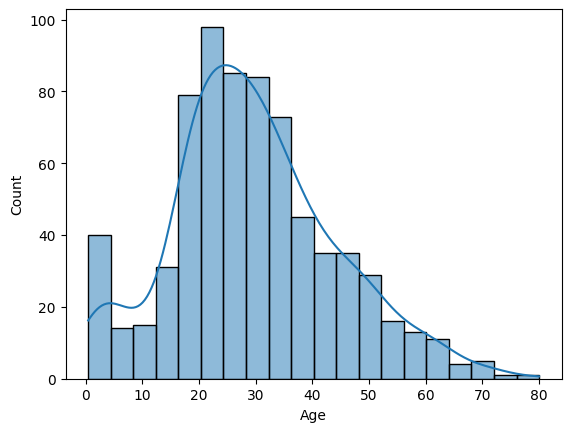

In [80]:
sns.histplot(x='Age',data=data,kde=True)

In [81]:
data['Age'].skew()

np.float64(0.38910778230082704)

<Axes: xlabel='Age'>

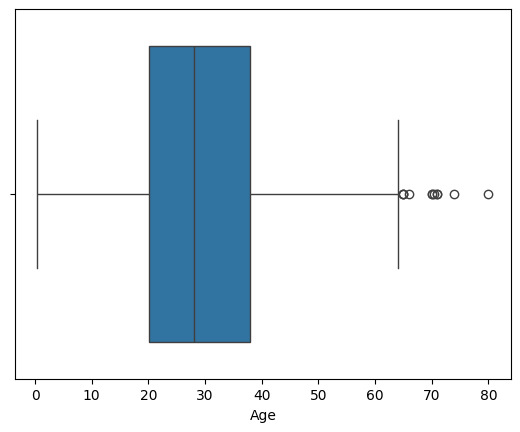

In [82]:
sns.boxplot(x='Age',data=data)

In [83]:
data[data['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


## Fare
**conclusion**
 - no null values
 - fare is positively skewed
 - there are somw outlier

In [84]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [85]:
data['Fare'].median()

np.float64(14.4542)

<Axes: xlabel='Fare', ylabel='Count'>

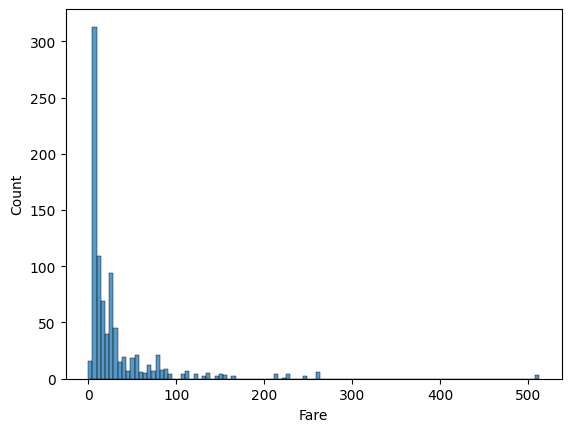

In [86]:
sns.histplot(x=data['Fare'],data=data)

<Axes: xlabel='Fare', ylabel='Density'>

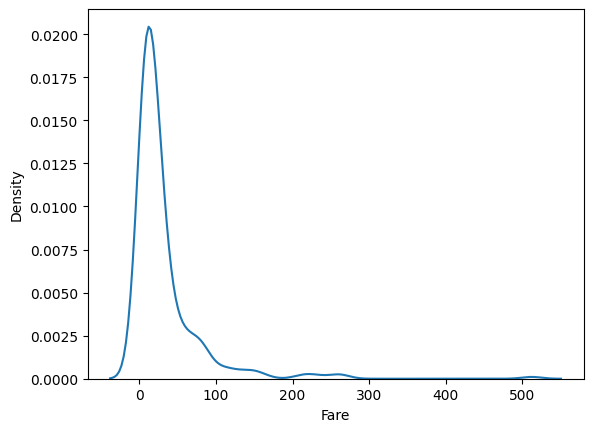

In [87]:
sns.kdeplot(x=data['Fare'],data=data)

In [88]:
data['Fare'].isnull().sum()/len(data['Fare'])

np.float64(0.0)

<Axes: >

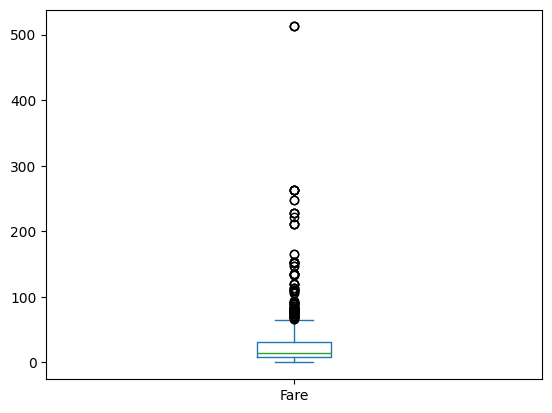

In [89]:
data['Fare'].plot(kind='box')

## Univariate analysis on categorical columns


 # EMBARKED
 **conlusion**
   - data is embalanced 
   - 

In [90]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

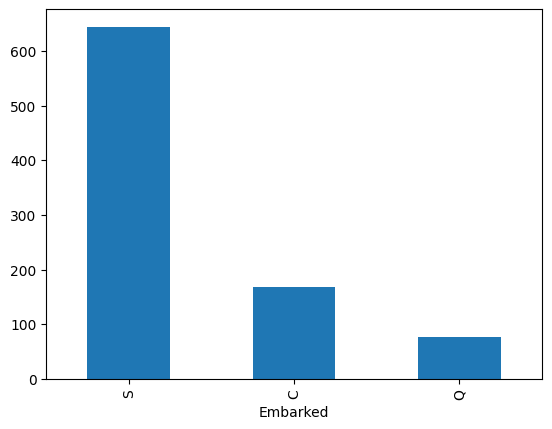

In [91]:
data['Embarked'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

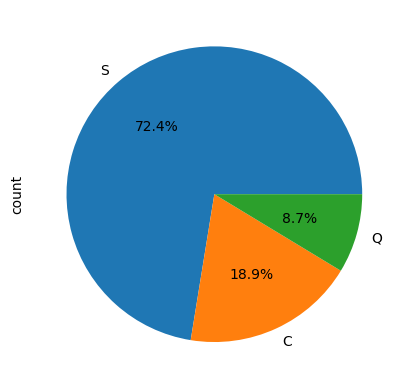

In [92]:
data['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [93]:
data['Embarked'].isnull().sum()/len(data['Embarked'])

np.float64(0.002244668911335578)

<Axes: >

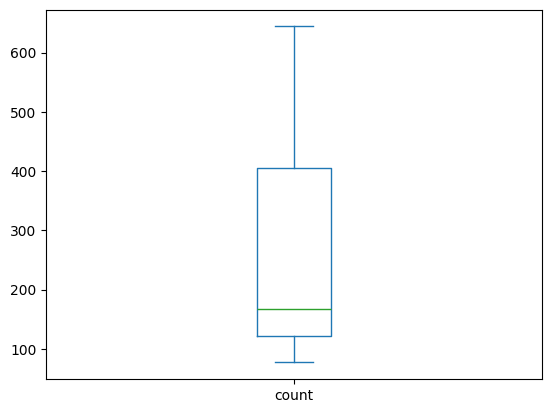

In [94]:
data['Embarked'].value_counts().plot(kind='box')

# Pclass
**conclusion**
  - no null values 
  - why people more in plcass 1?
  
  

In [95]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

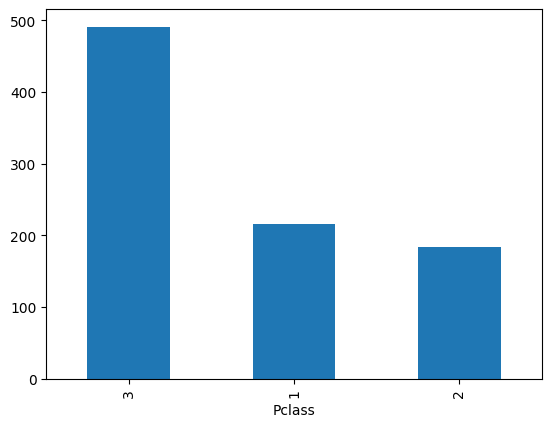

In [96]:
data['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

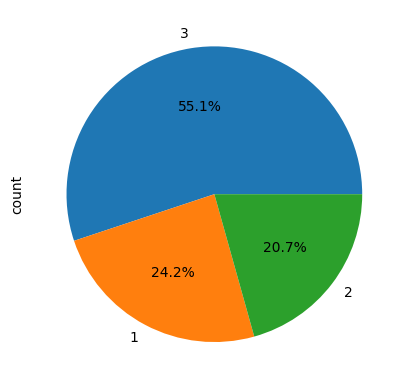

In [97]:
data['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')


In [98]:
data['Pclass'].isnull().sum()/len(data['Pclass'])

np.float64(0.0)

# SibSp
 **conclusion**
   - more people travled 
   - no null values

In [99]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: ylabel='count'>

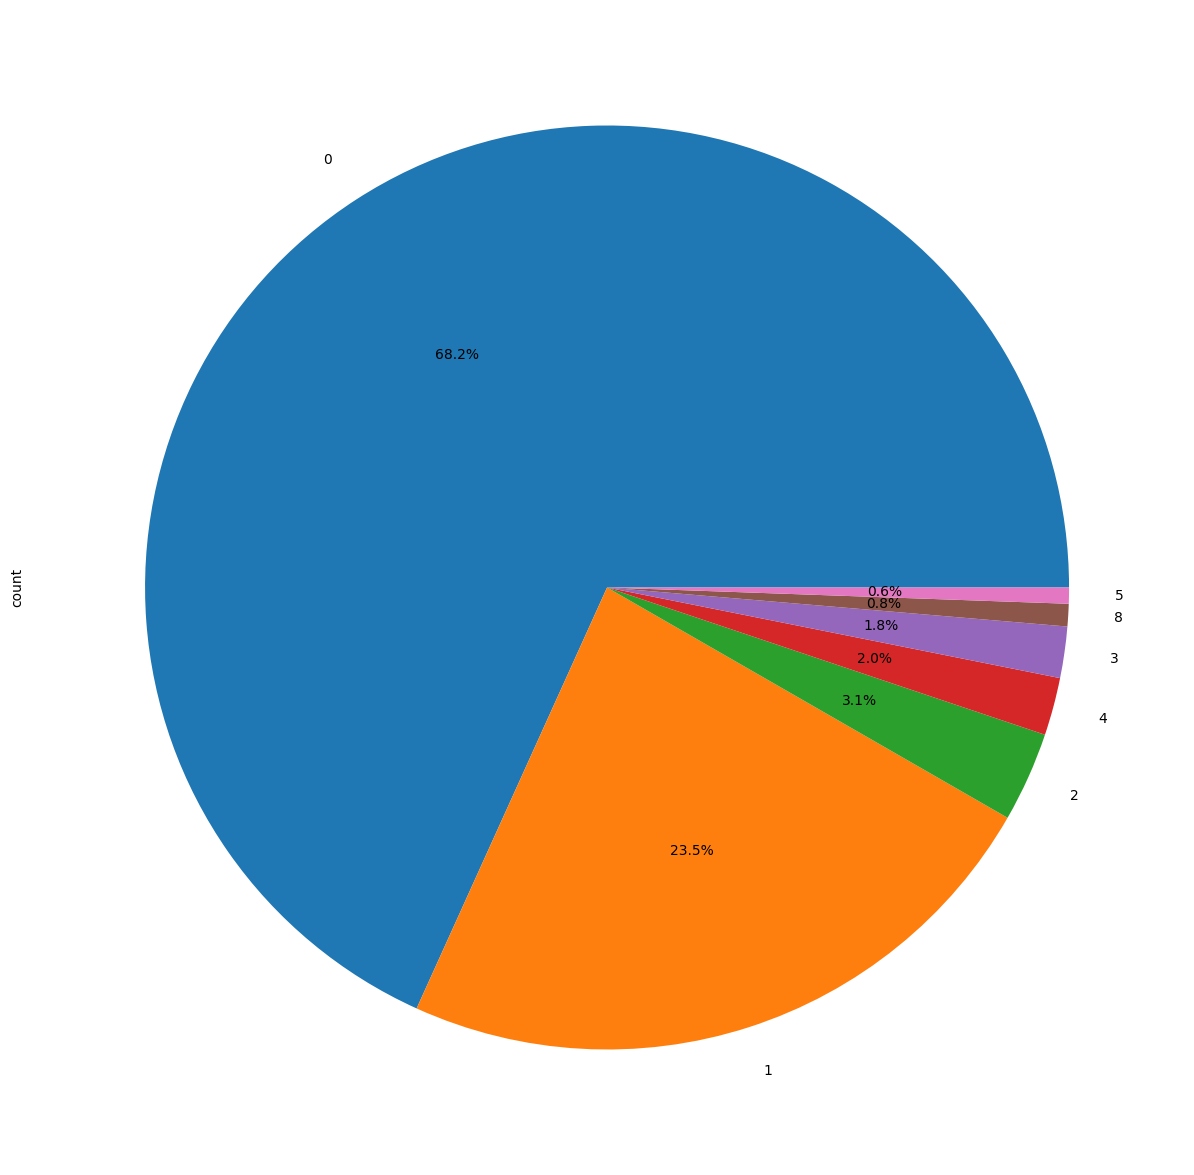

In [100]:
data['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=(15,15))

# Survived
 *conclusion*
  - percentage of survived people is higher

In [101]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [102]:
data['Survived'].isnull().sum()

np.int64(0)

<Axes: xlabel='Survived'>

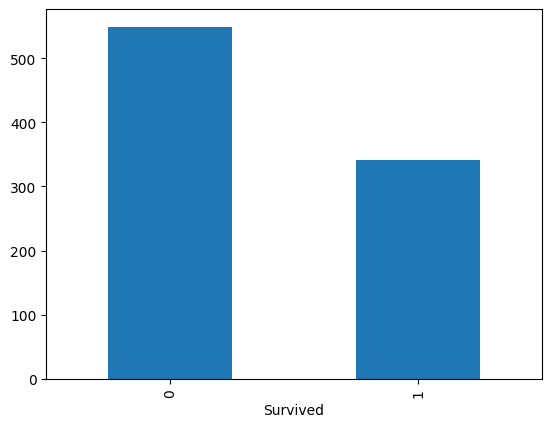

In [103]:
data['Survived'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

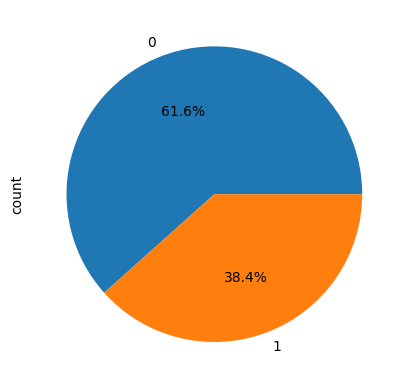

In [104]:
data['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')


# Sex 
   **conclusion**
  - percentage of male is greater then female
  - no null values

In [105]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

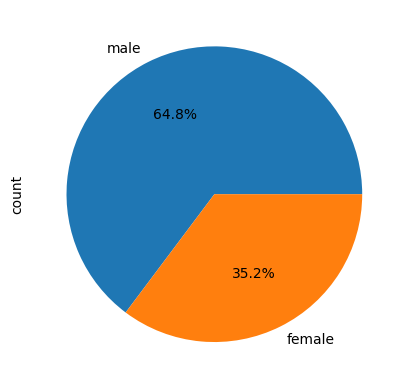

In [106]:
data['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [107]:
data['Sex'].isnull().sum()

np.int64(0)

## Bivariate Analysis

In [108]:
pd.crosstab(data['Survived'],data['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [109]:
pd.crosstab(data['Survived'],data['Embarked'],normalize='columns')*100


Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


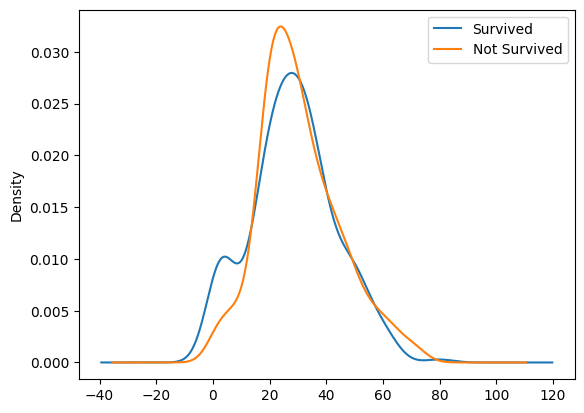

In [110]:
# survived and age

data[data['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
data[data['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

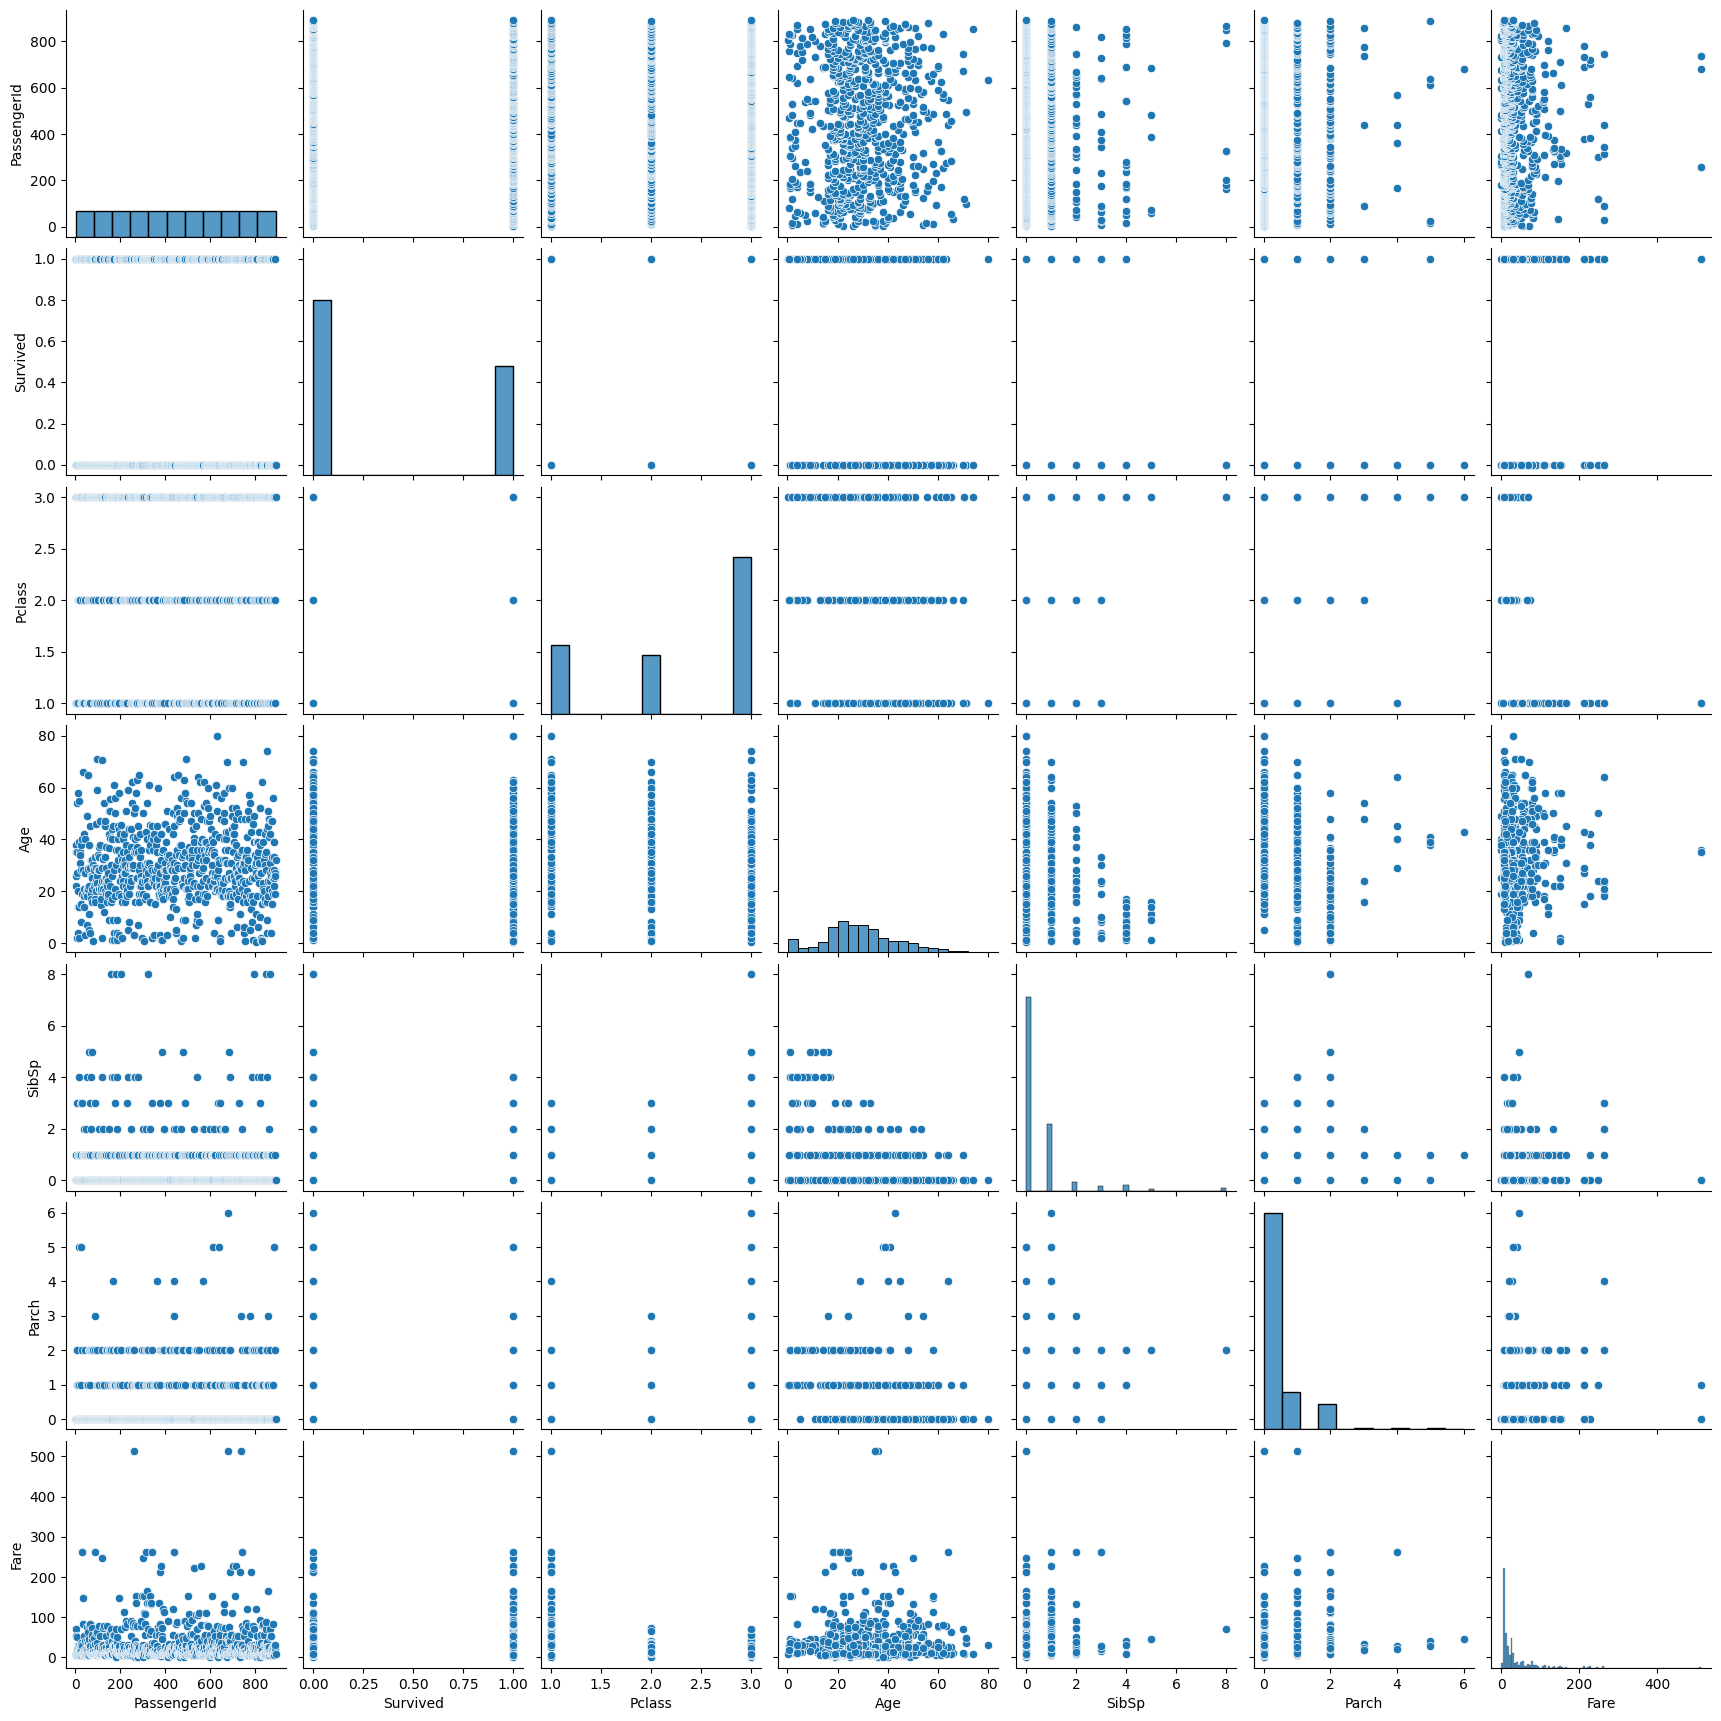

In [111]:
sns.pairplot(data)

In [112]:
numerical_col=[col for col in data.columns if data[col].dtype in ['int64', 'float64']]
data[numerical_col].corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

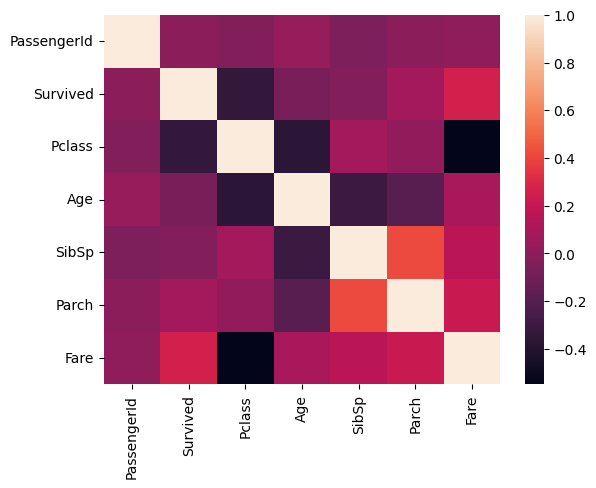

In [113]:
sns.heatmap(data[numerical_col].corr())